In [ ]:
# !pip install zepid
# !pip install forestplot

In [2]:
import pandas as pd
import numpy as np
import pickle
import scipy.stats
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import zepid
from zepid.graphics import EffectMeasurePlot
import forestplot as fp

In [3]:
crossVal = pd.read_csv('../../MODELS/CrossVal.csv')
internalVal = pd.read_csv('../../MODELS/internalValResult.csv')
externalVal = pd.read_csv('../../MODELS/externalValResult.csv')
lstm = pd.read_csv('../../MODELS/LSTM_simple.csv')

In [4]:
import string
crossVal['model_name'] = crossVal['model_name'].str.rstrip(string.digits)
internalVal['model_name'] = internalVal['model_name'].str.rstrip(string.digits)
externalVal['model_name'] = externalVal['model_name'].str.rstrip(string.digits)
lstm['model_name'] = lstm['model_name'].str.rstrip(string.digits)
allData = pd.concat([crossVal, lstm])

In [5]:
temp = crossVal[crossVal.outcome == 'outcome_12months']
a = temp[['model_name', 'auc' ]].groupby('model_name').mean()
b = temp[['model_name', 'auc' ]].groupby('model_name').std()
c = temp[['model_name', 'auc' ]].groupby('model_name').min()
d = temp[['model_name', 'auc' ]].groupby('model_name').max()
a = a.merge(b, right_index=True, left_index=True, suffixes=['_mean', '_std'])
c = c.merge(d, right_index=True, left_index=True, suffixes=['_min', '_max'])
fp_df = a.merge(c, right_index=True, left_index=True)


In [6]:
fp_df

,auc_mean,auc_std,auc_min,auc_max
model_name,,,,
DT,0.79162,0.003983,0.7845,0.7982
ElasticNet,0.80344,0.002357,0.8002,0.8072
LR,0.80343,0.002359,0.8002,0.8072
RF,0.81553,0.002877,0.8105,0.8189
XGB,0.81602,0.002711,0.8121,0.8203


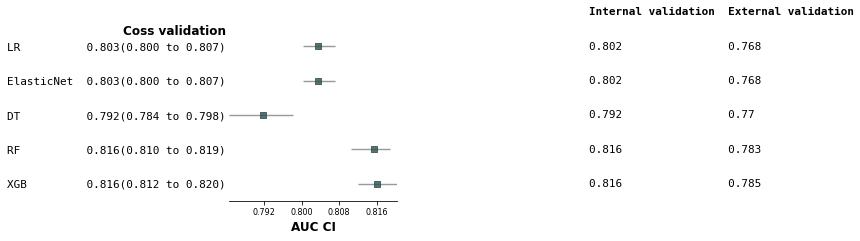

In [9]:
target_outcomes = [
    # 'outcome_3months', 'outcome_6months', 'outcome_9months', 
    'outcome_12months',
] 

for target_outcome in target_outcomes:
    temp = crossVal[crossVal.outcome == target_outcome]
    temp.reset_index(inplace=True, drop=True)
    a = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).mean()
    b = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).std()
    c = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).min()
    d = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).max()
    a = a.merge(b, right_index=True, left_index=True, suffixes=['_mean', '_std'])
    c = c.merge(d, right_index=True, left_index=True, suffixes=['_min', '_max'])
    fp_df = a.merge(c, right_index=True, left_index=True)
    fp_df['model_name'] = fp_df.index
    fp_df.reset_index(drop=True, inplace=True)
    fp_df = fp_df.merge(internalVal[internalVal.outcome==target_outcome][['model_name', 'auc']], on='model_name')
    fp_df.rename(columns={'auc': 'InternalVal'}, inplace=True)
    fp_df = fp_df.merge(externalVal[externalVal.outcome==target_outcome][['model_name', 'auc']], on='model_name')
    fp_df.rename(columns={'auc': 'ExternalVal'}, inplace=True)
    fp_df['InternalVal'] = fp_df.InternalVal.apply(lambda x: np.round(x, 3))
    fp_df['ExternalVal'] = fp_df.ExternalVal.apply(lambda x: np.round(x, 3))

    fp.forestplot(fp_df,  # the dataframe with results data
              estimate="auc_mean",  # col containing estimated effect size 
              ll="auc_min", hl="auc_max",  # columns containing conf. int. lower and higher limits
              varlabel="model_name",  # column containing variable label
              decimal_precision=3,
              ylabel="Coss validation",  # y-label title
              figsize=(3,3),
              rightannote=['InternalVal', 'ExternalVal' ],
              right_annoteheaders=['Internal validation', 'External validation'],
              fontsize = 11,
              # table = True,
              xlabel="AUC CI" , # x-label title
              )
    plt.xticks(fontsize=8)
    # plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

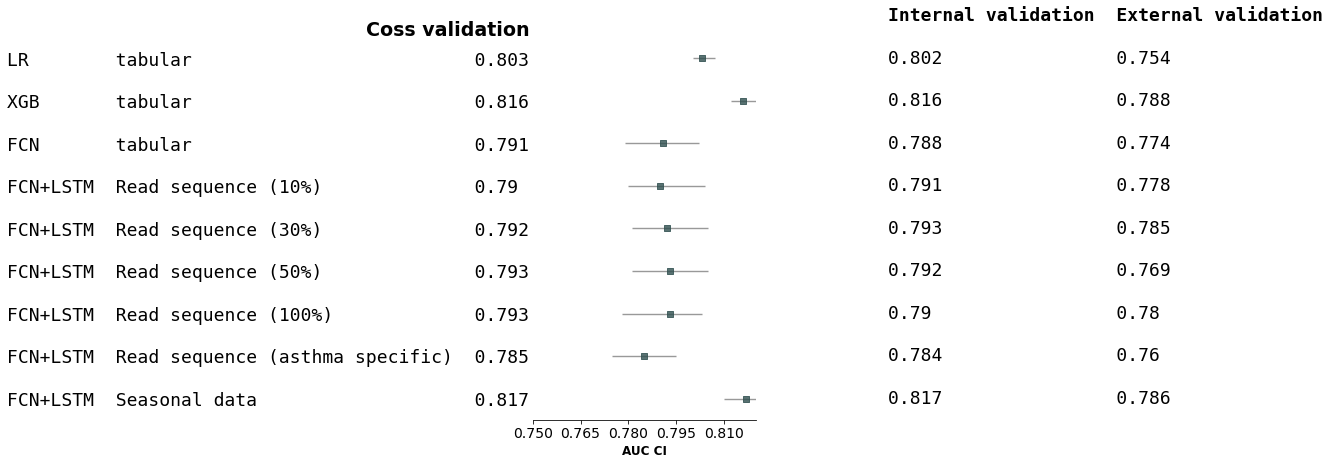

In [10]:
target_outcomes = [
    # 'outcome_3months', 'outcome_6months', 'outcome_9months', 
    'outcome_12months',
] 

for target_outcome in target_outcomes:
    fp_df = pd.read_csv('../../MODELS/fp_df.csv')

    fp.forestplot(fp_df,  # the dataframe with results data
              estimate="auc_mean",  # col containing estimated effect size 
              ll="auc_min", hl="auc_max",  # columns containing conf. int. lower and higher limits
              varlabel="model_name",  # column containing variable label
              decimal_precision=3,
              ylabel="Coss validation",  # y-label title
              figsize=(4,7),
                  annote=['Input', 'auc_mean'],
              rightannote=['InternalVal', 'ExternalVal' ],
              right_annoteheaders=['Internal validation', 'External validation'],
              fontsize = 18,
              # table = True,
              xlabel="AUC CI" , # x-label title
              )
    plt.xticks(fontsize=14)
    plt.xlim(.75, .82)
    # plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

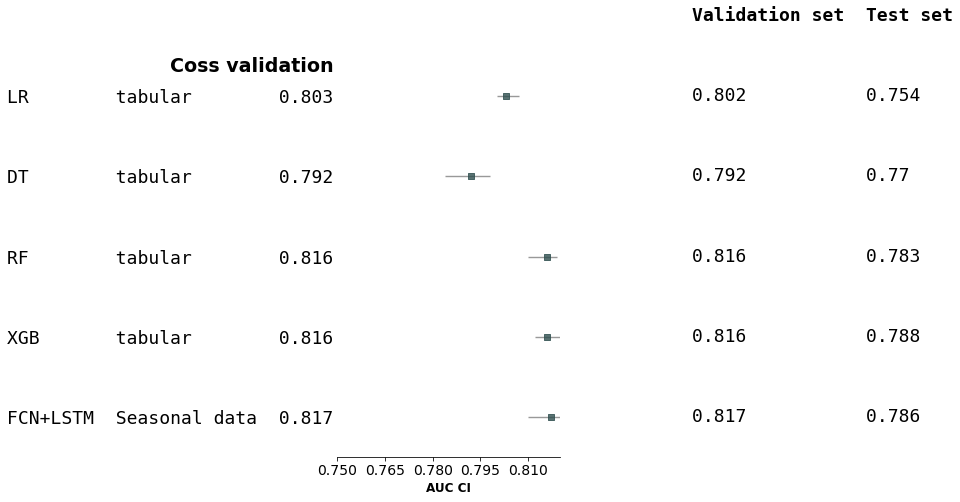

In [11]:
#PAPER
target_outcomes = [
    # 'outcome_3months', 'outcome_6months', 'outcome_9months', 
    'outcome_12months',
] 

for target_outcome in target_outcomes:
    fp_df = pd.read_csv('../../MODELS/fp_df_paper.csv')

    fp.forestplot(fp_df,  # the dataframe with results data
              estimate="auc_mean",  # col containing estimated effect size 
              ll="auc_min", hl="auc_max",  # columns containing conf. int. lower and higher limits
              varlabel="model_name",  # column containing variable label
              decimal_precision=3,
              ylabel="Coss validation",  # y-label title
              figsize=(4,7),
                annote=['Input', 'auc_mean'],
              rightannote=['Validation set', 'Test set' ],
              right_annoteheaders=['Validation set', 'Test set'],
              fontsize = 18,
              # table = True,
              xlabel="AUC CI" , # x-label title
              )
    plt.xticks(fontsize=14)
    plt.xlim(.75, .82)
    # plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

In [7]:
fp_df

,auc_mean,auc_std,auc_min,auc_max,model_name,Input,InternalVal,ExternalVal
0,0.80343,0.002359,0.8002,0.8072,LR,tabular,0.802,0.754
1,0.81602,0.002711,0.8121,0.8203,XGB,tabular,0.816,0.788
2,0.79100,0.002670,0.7790,0.8020,FCN,tabular,0.788,0.774
3,0.79000,0.002560,0.7800,0.8040,FCN+LSTM,Read sequence (10%),0.791,0.778
4,0.79200,0.002460,0.7810,0.8050,FCN+LSTM,Read sequence (30%),0.793,0.785
5,0.79300,0.002510,0.7810,0.8050,FCN+LSTM,Read sequence (50%),0.792,0.769
6,0.79300,0.002420,0.7780,0.8030,FCN+LSTM,Read sequence (100%),0.790,0.780
7,0.78500,0.002440,0.7750,0.7950,FCN+LSTM,Read sequence (asthma specific),0.784,0.760
8,0.81700,0.002520,0.8100,0.8200,FCN+LSTM,Seasonal data,0.817,0.786


In [15]:
fp_df.to_csv('../MODELS/fp_df.csv', index_label=False, index=False)

In [ ]:
target_outcomes = [
    # 'outcome_3months', 'outcome_6months', 'outcome_9months', 
    'outcome_12months',
] 

for target_outcome in target_outcomes:
    temp = lstm[lstm.outcome == target_outcome]
    temp.reset_index(inplace=True, drop=True)
    a = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).mean()
    b = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).std()
    c = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).min()
    d = temp[['model_name', 'auc' ]].groupby('model_name', sort=False).max()
    a = a.merge(b, right_index=True, left_index=True, suffixes=['_mean', '_std'])
    c = c.merge(d, right_index=True, left_index=True, suffixes=['_min', '_max'])
    fp_df = a.merge(c, right_index=True, left_index=True)
    fp_df['model_name'] = fp_df.index
    fp_df.reset_index(drop=True, inplace=True)
    fp_df = fp_df.merge(internalVal[internalVal.outcome==target_outcome][['model_name', 'auc']], on='model_name')
    fp_df.rename(columns={'auc': 'InternalVal'}, inplace=True)
    fp_df = fp_df.merge(externalVal[externalVal.outcome==target_outcome][['model_name', 'auc']], on='model_name')
    fp_df.rename(columns={'auc': 'ExternalVal'}, inplace=True)
    fp_df['InternalVal'] = fp_df.InternalVal.apply(lambda x: np.round(x, 3))
    fp_df['ExternalVal'] = fp_df.ExternalVal.apply(lambda x: np.round(x, 3))

    fp.forestplot(fp_df,  # the dataframe with results data
              estimate="auc_mean",  # col containing estimated effect size 
              ll="auc_min", hl="auc_max",  # columns containing conf. int. lower and higher limits
              varlabel="model_name",  # column containing variable label
              decimal_precision=3,
              ylabel="Coss validation",  # y-label title
              figsize=(3,3),
              rightannote=['InternalVal', 'ExternalVal' ],
              right_annoteheaders=['Internal validation', 'External validation'],
              fontsize = 11,
              # table = True,
              xlabel="AUC CI" , # x-label title
              )
    plt.xticks(fontsize=8)
    # plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

In [ ]:
fp_df

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
models = ['FCN', '100%', '10%', '30%', '50%', 'specific']
auc_df = []
for model in models:
    auc, _ = pickle.load(open('../SeqModel/CV_result_lstm_18+_'+model+'.sav', 'rb'))#
    auc_df.append(auc)

In [ ]:
auc_df = pd.DataFrame(auc_df).T
auc_df.columns = models

In [ ]:
fp_df = []
for model in models:
    temp = mean_confidence_interval(auc_df[model].values)
    fp_df.append([model]+[x for x in temp])


In [ ]:
auc_df.apply(lambda x: np.max(x) - np.min(x))

In [ ]:
data = pd.read_csv('../FinalData/DL-18+.csv')

In [ ]:
data

In [ ]:
fp_df = pd.DataFrame(fp_df, columns=['model', 'mean', 'li', 'ui'])
fp_df['label'] = ['FCN', 'FCN + LSTM', 'FCN + LSTM (10%)', 'FCN + LSTM (30%)', 'FCN + LSTM (50%)', 'FCN + LSTM (asthma specific)']
fp_df['AUC score in hold-out set'] = data.auc.values
fp_df['range'] = fp_df.apply(lambda x: x.ui-x.li, axis=1)


In [ ]:
fp_df.range.mean()

In [ ]:
fp_df.range.std()

In [ ]:
fp.forestplot(fp_df,  # the dataframe with results data
              estimate="mean",  # col containing estimated effect size 
              ll="li", hl="ui",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              decimal_precision=4,
              ylabel="",  # y-label title
              figsize=(2,3),
              rightannote=['AUC score in hold-out set'],
              right_annoteheaders=['AUC score in the evaluation set'],
              fontsize = 11,
              table = True
              # xlabel="Pearson correlation"  # x-label title
              )
plt.xticks(fontsize=8)
plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

In [ ]:
fp_df1

In [ ]:
fp_df

In [ ]:
fp_df1 = pd.read_csv('../FinalData/forestPlotIwithLR.csv')

In [ ]:
fp.forestplot(fp_df1,  # the dataframe with results data
              estimate="mean",  # col containing estimated effect size 
              ll="li", hl="ui",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              decimal_precision=4,
              ylabel="",  # y-label title
              figsize=(2,3),
              rightannote=['AUC score in hold-out set'],
              right_annoteheaders=['AUC score in the evaluation set'],
              fontsize = 11,
              table = True,
              )
plt.xticks(fontsize=8)
plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=10)

In [ ]:
fp.forestplot(fp_df1,  # the dataframe with results data
              estimate="mean",  # col containing estimated effect size 
              ll="li", hl="ui",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              decimal_precision=4,
              capitalize="capitalize",
              # figsize=(3,5),
              annote=['model', 'est_ci'],
              annoteheaders=['Model', 'Est_ci'],
              rightannote=['AUC score in hold-out set'],
              right_annoteheaders=['AUC score in hold-out set'],
              fontsize = 9,
              table = True,
              # xlabel="Pearson correlation"  # x-label title
              )
plt.xticks(fontsize=9)
# plt.ylabel('AUC score (confidence interval) - cross validation', loc='top', fontsize=9)

In [ ]:
auc_df.boxplot()

In [ ]:
plt.boxplot(auc_df, 0, 'g.', whis=[0.5, 99.5])

In [ ]:
result = [x for x in mean_confidence_interval(auc)]
result = ['lstm'] + result

In [ ]:
result = pd.DataFrame([result], columns=['model','mean', 'lc', 'uc'])

In [ ]:
result

In [ ]:
plt.figure(figsize=(5, 6), dpi=150)
ci = [result.iloc[::-1]['mean'] - result.iloc[::-1]['lc'].values, result.iloc[::-1]['uc'].values - result.iloc[::-1]['mean']]
plt.errorbar(x=result.iloc[::-1]['mean'], y=result.iloc[::-1].model.values, xerr=ci,
            color='black',  capsize=2, linestyle='None', elinewidth=1,
            marker='o', markersize=3, mfc="black", mec="black",barsabove=True,
            lolims=.7)
# plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
# plt.xlim(0.7, 0.9)
plt.tick_params(direction='inout', axis='both', which='major', labelsize=5)
plt.xlabel('Cross validation performance', fontsize=8)
plt.tight_layout()

In [ ]:

labs = ['LSTM', 'LSTM30%']
measure = [0.7923634350299835, 0.810]
lower = [0.7823105472504817, 0.7988]
upper = [0.8024163228094854, 0.8231]
p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
p.labels(effectmeasure='AUC')
p.colors(pointshape="D")
ax=p.plot(figsize=(7,3), t_adjuster=0.2, max_value=.9, min_value=0.5 )
# plt.title("Random Effect Model(Risk Ratio)",loc="right",x=1, y=1.045)
# plt.suptitle("Missing Data Imputation Method",x=-0.1,y=0.98)
# ax.set_xlabel("Favours Control      Favours Haloperidol       ", fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
# plt.savefig("Missing Data Imputation Method",bbox_inches='tight')

In [ ]:
# meta-analysis and forest plot
results = combine_effects(mean_effect, var_effect, method_re="chi2", use_t=True, row_names=idx)
print(results.summary_frame())
fig = results.plot_forest()